# Diskrete sannsynlighetsfordelinger

Nå skal vi se på noen diskrete sannsynlighetsfordelinger. Vi starter med binomisk fordeling. Scipy sin stats-modul inneholder ferdig funksjonalitet for denne, og [mange andre diskrete fordelinger](https://docs.scipy.org/doc/scipy-0.16.1/reference/stats.html#discrete-distributions).

## Binomisk sannsynlighetsfordeling

La oss si at vi har en bøyd mynt som har 60% sjanse for kron. Vi kaster den 10 ganger. Hva er sannsynligheten for at vi får 0, 1, 2 eller 3 kron?

In [1]:
from scipy.stats import binom # Importerer / henter inn binom (Binomisk fordeling)

n = 10
p = 0.6

mynt_kron = binom.pmf([0, 1, 2, 3], n, p)

mynt_kron

array([ 0.00010486,  0.00157286,  0.01061683,  0.04246733])

Her bruker vi "pmf"-metoden til binom-fordelingen. PMF står for "Probability Mass Function". Vi sier at vi vil ha sannsynligheten for 0, 1, 2 og 3 kron (første parameter), med 10 kast (andre parameter). Hvert kast er uavhengig av tidligere kast, og har 60% (0.6) sjanse for kron.

Vi ser at vi får tilbake en liste. Første verdi er sannsynligheten for 0 kron, andre verdi for 1 kron osv. Hvis vi vil ha summen av sannsynlighetene, bruker vi "sum"-funksjonen til Python, slik:

In [2]:
sum(mynt_kron)

0.054761881600000041

Vi ser dermed at det er ca 5.5% sjanse for at vi får 0, 1, 2 eller 3 kron på 10 kast, med denne bøyde mynten.

Videre kan vi også finne variansen til en binomisk fordeling, ved å bruke "var"-funksjonen til "binom". Her er parameterne 10 og 0.6 hhv. antall kast, og sannsynlighet for kron.

In [3]:
print('Varians:', binom.var(n, p))
print('Forventning:', n * p)

Varians: 2.4
Forventning: 6.0


### Plotting av sannsynlighetsfordeling

Vi kan plotte sannsynlighetsfordelingen ved å hente inn Series-objektet fra Pandas. Vi bruker "binom", som tidligere, men nå henter vi verdier for hele intervallet vi er interesserte i.

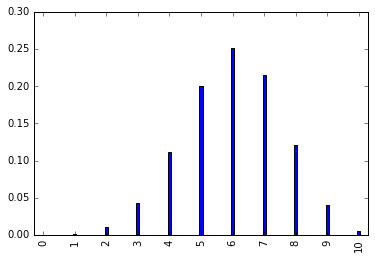

In [14]:
%matplotlib inline
from pandas import Series
import matplotlib.pyplot as plt

# Som over, men her henter vi for alle de diskrete verdiene, ikke bare 0, 1, 2, 3
mynt_alle = binom.pmf(range(n+1), n, p) # range(n+1) gir oss en liste med n elementer [0, ... n]

# Lage en Pandas-serie med datapunktene
data = Series(mynt_alle)

# Plotte fordelingen som et stolpediagram
data.plot.bar(width=0.1)
plt.show()

## Hypergeometrisk sannsynlighetsfordeling

Alle de diskrete sannsynlighetsfordelingene i scipy.stats-modulen brukes på en ganske tilsvarende måte. Vi gir dem noen parametere inn i fordelingens "pmf"-funksjon. Man har også tilgang til f.eks. varians og standardavvik på en tilsvarende måte som i den binomiske sannsynlighetsfordelingen vi brukte over.

Vi skal nå se på den hypergeometriske sannsynlighetsfordelingen.

Eksempel: Vi har en blandingspose med peanøtter og cashewnøtter. Det er 20 peanøtter og 10 cashewnøtter igjen. Du snur posen opp ned, og det ramler ut åtte nøtter. Selv om peanøtter og cashewnøtter har litt ulik form, regner vi med at dette ikke har noen innvirkning på hva som faller ut av posen.

Hva er sannsynligheten for å færre enn tre cashewnøtter?

In [24]:
from scipy.stats import hypergeom

n = 8
S = 10
N = 30

notter = hypergeom.pmf([0, 1, 2], N, S, n)

sum(notter)

0.45197401299350742

Altså rett over 45% sjanse. Som i forrige eksempel, kan vi også lage en f

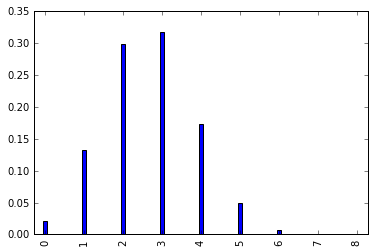

In [38]:
notter_alle = hypergeom.pmf(range(n+1), N, S, n)

data = Series(notter_alle)
data.plot.bar(width=0.1)
plt.show()